#Import data

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import numpy as np
import seaborn as sns

In [ ]:
path="/content/drive/MyDrive/IE224/Process 2/data_process2.csv"

In [ ]:
df= pd.read_csv(path)

In [ ]:
df

,Company,TypeName,Inches,OpSys,Weight,Price,Ram_capacity,Ram_model,Touchscreen,Screen_resolution,...,Memory1,Memory2,Capacity1,Storage_Type_1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded
0,Lenovo,Notebook,17.3,Windows 10,2.40,319.0,6.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,35,0,18,0
1,HP,Notebook,17.3,Windows 10,2.65,363.8,4.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,42,0,29,0
2,Acer,Notebook,17.3,Windows 10,2.20,370.2,4.0,0,0,1366x768,...,128GB HDD,0,128.0,HDD,0.0,0,0,1,34,0
3,HP,Notebook,15.6,Windows 10,2.71,418.8,4.0,0,0,1920x1080,...,500GB HDD,0,500.0,HDD,0.0,0,42,1,7,10
4,HP,Notebook,17.3,Windows 10,1.91,363.7,4.0,0,0,1920x1080,...,128GB HDD,0,128.0,HDD,0.0,0,42,2,7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1352,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2275.0,325.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5
1353,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2279.0,325.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5
1354,Alienware,Gaming,18.4,System Windows 11 Pro,2.04,2488.0,164.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,40,5
1355,Alienware,Gaming,18.4,System RTX 3080,2.04,2499.0,324.0,1,0,1920x1080,...,1TB SSD,1,1000.0,SSD,1000.0,1,66,116,110,5


In [ ]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'OpSys', 'Weight', 'Price',
       'Ram_capacity', 'Ram_model', 'Touchscreen', 'Screen_resolution',
       'Brand_RAM', 'Model', 'Clockspeed', 'Memory1', 'Memory2', 'Capacity1',
       'Storage_Type_1', 'Capacity2', 'Storage_Type_2',
       'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded',
       'Memory_encoded'],
      dtype='object')

In [ ]:
data_types = df.dtypes

numeric_columns = data_types[(data_types == 'float64') | (data_types == 'int64')].index
categorical_columns = data_types[data_types == 'object'].index

# In danh sách các cột biến số và biến phân loại
print("Biến số:")
print(numeric_columns)

print("\nBiến phân loại:")
print(categorical_columns)

Biến số:
Index(['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen',
       'Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2',
       'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded',
       'Memory_encoded'],
      dtype='object')

Biến phân loại:
Index(['Company', 'TypeName', 'OpSys', 'Screen_resolution', 'Brand_RAM',
       'Model', 'Memory1', 'Storage_Type_1'],
      dtype='object')


#Mô Hình Máy Học

- ['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen','Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2','ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded','Memory_encoded']

- Chọn tham số

['Inches', 'Weight', 'Price', 'Ram_capacity', 'Ram_model', 'Touchscreen','Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2','ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded','Memory_encoded']

#Chọn các cột để huấn luyện

In [ ]:
df_machine=df[['Inches','Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2','ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded','Memory_encoded',  'Price']]

In [ ]:
df[['Inches','Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2','ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded','Memory_encoded', 'Price']]

,Inches,Clockspeed,Memory2,Capacity1,Capacity2,Storage_Type_2,ScreenResolution_encoded,Cpu_encoded,Gpu_encoded,Memory_encoded,Price
0,17.3,2.4,0,128.0,0.0,0,35,0,18,0,319.0
1,17.3,2.4,0,128.0,0.0,0,42,0,29,0,363.8
2,17.3,2.5,0,128.0,0.0,0,0,1,34,0,370.2
3,15.6,2.5,0,500.0,0.0,0,42,1,7,10,418.8
4,17.3,2.5,0,128.0,0.0,0,42,2,7,0,363.7
...,...,...,...,...,...,...,...,...,...,...,...
1352,18.4,2.5,1,1000.0,1000.0,1,66,116,110,5,2275.0
1353,18.4,2.5,1,1000.0,1000.0,1,66,116,110,5,2279.0
1354,18.4,2.5,1,1000.0,1000.0,1,66,116,40,5,2488.0
1355,18.4,2.5,1,1000.0,1000.0,1,66,116,110,5,2499.0


Chia dữ liệu

In [ ]:
from sklearn.model_selection import train_test_split
features = ['Inches', 'Clockspeed', 'Memory2', 'Capacity1', 'Capacity2', 'Storage_Type_2', 'ScreenResolution_encoded', 'Cpu_encoded', 'Gpu_encoded', 'Memory_encoded']
target = 'Price'
X = df_machine[features]
y = df_machine[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Hồi quy đa thức

Tìm ra bậc tốt nhất

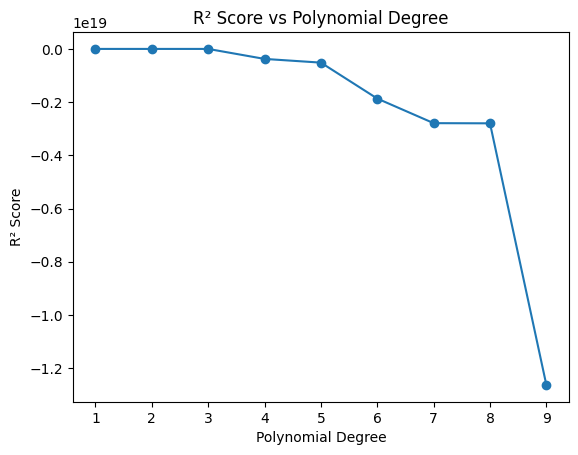

The best polynomial degree is 2


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

# Assuming X, y are defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of polynomial degrees to try
degrees = np.arange(1, 10)
r2_scores = []

for degree in degrees:
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(X_train_poly, y_train)

    # Make predictions on the test set
    y_pred_poly = poly_model.predict(X_test_poly)

    # Calculate R² score
    r2 = r2_score(y_test, y_pred_poly)
    r2_scores.append(r2)

# Find the degree with the highest R² score
best_degree = degrees[np.argmax(r2_scores)]

# Visualize R² scores
plt.plot(degrees, r2_scores, marker='o')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Score vs Polynomial Degree')
plt.show()

print(f"The best polynomial degree is {best_degree}")


In [ ]:
r2_scores

[0.6980751139120602,
 0.8865831710537019,
 -2589.9547143395193,
 -3.756466651780092e+17,
 -5.150580893759683e+17,
 -1.866098510473913e+18,
 -2.7904660918743183e+18,
 -2.7966894325478513e+18,
 -1.2629146013173848e+19]

Chọn Bậc 2


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split


poly = PolynomialFeatures(degree=2)
X_train_poly_2 = poly.fit_transform(X_train)
X_test_poly_2 = poly.transform(X_test)

# Khởi tạo và huấn luyện mô hình hồi quy tuyến tính
poly_model = LinearRegression()
poly_model.fit(X_train_poly_2, y_train)

# Dự đoán trên tập kiểm tra
y_pred_poly_2 = poly_model.predict(X_test_poly_2)

# Đánh giá mô hình sử dụng các thang đo
mse_poly_2 = mean_squared_error(y_test, y_pred_poly_2, squared=True)
rmse_poly_2 = mean_squared_error(y_test, y_pred_poly_2, squared=False)
mae_poly_2 = mean_absolute_error(y_test, y_pred_poly_2)
r2_poly_2 = r2_score(y_test, y_pred_poly_2)

# In kết quả
print(f'Polynomial Regression MSE: {mse_poly_2:.2f}')
print(f'Polynomial Regression RMSE: {rmse_poly_2:.2f}')
print(f'Polynomial Regression MAE: {mae_poly_2:.2f}')
print(f'Polynomial Regression R²: {r2_poly_2:.2f}')


Polynomial Regression MSE: 31829.32
Polynomial Regression RMSE: 178.41
Polynomial Regression MAE: 97.84
Polynomial Regression R²: 0.89


In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for visualization
df_poly_2_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_poly_2})

# Scatter plot using px
poly_1_scatter_fig = px.scatter(df_poly_2_scatter, x='Actual', y='Predicted',
                                 title='Actual vs Predicted Values (Polynomial Regression Degree 2)',
                                 labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'})
poly_1_scatter_fig.show()


#SVM

In [ ]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Khởi tạo và huấn luyện mô hình SVM
svm_model = SVR(kernel='linear')  # Chọn kernel tùy thuộc vào bối cảnh, 'linear' là một lựa chọn phổ biến cho hồi quy tuyến tính
svm_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình sử dụng các thang đo
mse_svm = mean_squared_error(y_test, y_pred_svm, squared=True)
rmse_svm = mean_squared_error(y_test, y_pred_svm, squared=False)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

# In kết quả
print(f'SVM RMSE: {mse_svm:.2f}')
print(f'SVM RMSE: {rmse_svm:.2f}')
print(f'SVM MAE: {mae_svm:.2f}')
print(f'SVM R²: {r2_svm:.2f}')


SVM RMSE: 123037.73
SVM RMSE: 350.77
SVM MAE: 210.36
SVM R²: 0.56


In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for visualization
df_svm_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_svm})

# Scatter plot using px
svm_scatter_fig = px.scatter(df_svm_scatter, x='Actual', y='Predicted',
                             title='Actual vs Predicted Values (SVM Regression)',
                             labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'})
svm_scatter_fig.show()

#KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
knn_model = KNeighborsRegressor(n_neighbors=5)  # Chọn số lân cận (neighbors) tùy thuộc vào bối cảnh
knn_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_knn = knn_model.predict(X_test)

# Đánh giá mô hình sử dụng các thang đo
mse_knn = mean_squared_error(y_test, y_pred_knn, squared=True)
rmse_knn = mean_squared_error(y_test, y_pred_knn, squared=False)
mae_knn = mean_absolute_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

# In kết quả
print(f'KNN RMSE: {mse_knn:.2f}')
print(f'KNN RMSE: {rmse_knn:.2f}')
print(f'KNN MAE: {mae_knn:.2f}')
print(f'KNN R²: {r2_knn:.2f}')

KNN RMSE: 54671.58
KNN RMSE: 233.82
KNN MAE: 132.49
KNN R²: 0.81


# AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Khởi tạo mô hình Decision Tree (weak learner)
base_model = DecisionTreeRegressor(max_depth=3)  # You can adjust max_depth based on your problem

# Khởi tạo và huấn luyện mô hình AdaBoost
adaboost_model = AdaBoostRegressor(base_model, n_estimators=50, random_state=42)
adaboost_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_adaboost = adaboost_model.predict(X_test)

# Đánh giá mô hình sử dụng các thang đo
mse_adaboost = mean_squared_error(y_test, y_pred_adaboost, squared=True)
rmse_adaboost = mean_squared_error(y_test, y_pred_adaboost, squared=False)
mae_adaboost = mean_absolute_error(y_test, y_pred_adaboost)
r2_adaboost = r2_score(y_test, y_pred_adaboost)

# In kết quả
print(f'AdaBoost MSE: {mse_adaboost:.2f}')
print(f'AdaBoost RMSE: {rmse_adaboost:.2f}')
print(f'AdaBoost MAE: {mae_adaboost:.2f}')
print(f'AdaBoost R²: {r2_adaboost:.2f}')


AdaBoost MSE: 29541.46
AdaBoost RMSE: 171.88
AdaBoost MAE: 129.05
AdaBoost R²: 0.89


In [ ]:
import plotly.express as px
import pandas as pd

# Create a DataFrame for visualization
df_adaboost_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_adaboost})

# Scatter plot using px
adaboost_scatter_fig = px.scatter(df_adaboost_scatter, x='Actual', y='Predicted',
                                   title='Dự đoán và giá thực (AdaBoost)',
                                   labels={'Actual': 'Gá', 'Predicted': 'Dự đoán'})
adaboost_scatter_fig.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Khởi tạo và huấn luyện mô hình Random Forest
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

# Dự đoán trên tập kiểm tra
y_pred_random_forest = random_forest_model.predict(X_test)

# Đánh giá mô hình sử dụng các thang đo
mse_random_forest = mean_squared_error(y_test, y_pred_random_forest, squared=True)
rmse_random_forest = mean_squared_error(y_test, y_pred_random_forest, squared=False)
mae_random_forest = mean_absolute_error(y_test, y_pred_random_forest)
r2_random_forest = r2_score(y_test, y_pred_random_forest)

# In kết quả
print(f'Random Forest MSE: {mse_random_forest:.2f}')
print(f'Random Forest RMSE: {rmse_random_forest:.2f}')
print(f'Random Forest MAE: {mae_random_forest:.2f}')
print(f'Random Forest R²: {r2_random_forest:.2f}')


Random Forest MSE: 19219.82
Random Forest RMSE: 138.64
Random Forest MAE: 73.20
Random Forest R²: 0.93


In [ ]:
import plotly.express as px

# Create a DataFrame for visualization
df_scatter = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_random_forest})

# Scatter plot using px
scatter_fig = px.scatter(df_scatter, x='Actual', y='Predicted', title='Actual vs Predicted Values (Random Forest)',
                         labels={'Actual': 'Actual Values', 'Predicted': 'Predicted Values'})
scatter_fig.show()

#Demo dự đoán

In [ ]:
# Nhập dữ liệu đầu vào cho việc dự đoán
new_data = {
    'Inches': 15.6,
    'Clockspeed': 2.5,
    'Memory2': 8,
    'Capacity1': 256,
    'Capacity2': 0,
    'Storage_Type_2': 1,
    'ScreenResolution_encoded': 0,
    'Cpu_encoded': 1,
    'Gpu_encoded': 2,
    'Memory_encoded': 3
}

# Chuyển đổi dữ liệu nhập vào thành DataFrame
new_data_df = pd.DataFrame([new_data])



SVM Predicted Price: 540.00 $


In [ ]:
# Dự đoán giá trị sử dụng mô hình SVM
predicted_price_knn = knn_model.predict(new_data_df)

# In kết quả dự đoán
print(f'Knn Predicted Price: {predicted_price_knn[0]:.2f}', '$')

Knn Predicted Price: 476.30 $


In [ ]:
# Dự đoán giá trị sử dụng mô hình SVM
predicted_price_svm = svm_model.predict(new_data_df)

# In kết quả dự đoán
print(f'SVM Predicted Price: {predicted_price_svm[0]:.2f}', '$')

SVM Predicted Price: 540.00 $
